# <span style="color:#900000">Astronomy at High Speed Notebook</span>

Developed by: *Tom Marsh, University of Warwick, UK.*


<a id="intro"></a>
## Introduction



This notebook presents exercises associated with the *Astronomy at High Speed* section of ThaiPASS 2021. The exercises focus upon eclipsing binary stars for which high-speed observations are often required. You should write up your answers to the exercises as a Jupyter notebook. The first exercises (A & B) are best done on pen and paper before writing them up in your notebook. The last ones (C) involve Python scripting. The exercise sections and exercises that answers are expected for are <span style="color:blue">highlighted in blue</span>. You might not find all the questions easy, but, if you struggle at all, don't worry, I am not looking for perfect answers -- the key thing is to have a go. I am happy to answer questions that you may have while working on this notebook on the *Astronomy at High Speed* channel of the ThaiPASS 2021 Slack workspace which you should have signed up to.

If you downloaded this file by cloning the [ThaiPASS2021 github site](https://github.com/Milne-Centre/ThaiPASS2021/tree/main/), then you should have associated support files and be ready to go. If you want to be sure, check that you have `binary.py`, and the ten data files `data01.txt`, `data02.txt`, ..., `data10.txt` in the same location as notebook.

---

## Eclipsing Binary Stars

Eclipsing binary stars are *the* key source for precision masses and radii of stars other than the Sun. The two stars in a binary can be assumed to have started with the same elemental composition, and to have formed at almost the same time, and so they provide superb tests of stellar structure and evolution models. The purpose of this notebook is to introduce fundamental apects of binary stars to do with eclipses, stellar radii and brightness. This is closely associated with the observational technique known as *photometry*, which nowadays is almost always carried out with two-dimensional multi-pixel cameras employing CCD detectors.


## Definitions

Here are definitions of terms I will use. Many, but not all, are in widespread use within the field. I also define some mostly standard symbols:

* **Orbital period, $P$**: the time taken for a binary star to complete one orbit.

* **Orbital separation, $a$**: the separation between the centres of the two stars. This is the parameter $a$ that appears in Kepler's third law, as put on a quantitative basis by Newton for two masses:
$$\frac{G(M_1+M_2)}{a^3} = \frac{4\pi^2}{P^2},$$
where $M_1$ and $M_2$ are the masses of the two stars.

* **Orbital axis**: the direction perpendicular to the orbital plane of the binary star. It is defined in a "right-handed" sense: if the fingers of your right hand point in the direction of binary motion, your thumb points in the direction of the orbital axis.

* **Earth vector**: direction from the binary star towards the observer. (NB One does not need to define a particular point within the binary star to start from because interstellar distances are so much larger than the dimensions of binary stars that it makes no siginificant difference to the Earth vector.)

* **Orbital inclination, $i$**: the angle (almost always in degrees) between the Earth vector and the orbital axis. $i=90^\circ$ is an edge-on system that will show eclipses as seen from Earth. $i = 0^\circ$ is face-on with its orbital axis pointing towards us; it would not eclipse.

* **Plane of the sky**: an imaginary plane perpendicular to the observer's line of sight to the binary star (the reverse direction to the "Earth vector"). As a first approximation, the best way to think about eclipsing binary stars is as they appear in projection onto the plane of the sky, i.e. as two circles moving relative to each other with one sometimes blocking the other. More on this below.

* **Orbital phase, $\phi$**: a particular moment in the orbit of a binary star is indicated by its *orbital phase*. Measured in cycles, it varies uniformly with time $t$ according to:
$$\phi = (t - T_0) / P,$$
where $T_0$ is a zeropoint in time representing $\phi = 0$. There is no generally agreed definition of which point in the orbit represents $\phi = 0$, but I will assume that it is the time when star 2 is closest to us and star 1 is furthest from us. Since I am focussing on eclipsing binary stars, this will be at mid-eclipse.

* **Total eclipses**: if at some point one star is totally hidden behind its companion, an eclipse is said to be "total".

* **Eclipses vs transits**: if a binary shows total eclipses with the larger star completely blocking our view of the smaller star, then at some other time in its orbit we will see the smaller star passing across or "transiting" the face of the larger star. This is a fine distinction, and it is common to refer to "eclipses" even when they are "transits" because they can appear very similar. In binary stars with circular orbits, the two eclipses per orbit occur precisely half an orbit apart.

* **Partial eclipses**: in many binary stars only partial obscuration occurs at each eclipse (and there is then no clear distinction between "eclipses" and "transits"). These are not nearly as useful for radius determination as total eclipses.

* **Surface brightness**: to analyse eclipses it is useful to think in terms of a brightness per unit area in the plane of the sky, called the "surface brightness". The flux we measure from a star is related to its "surface brightness" multiplied by the area on the plane of the sky of whatever part of it is visible. Hopefully, this will become a little clearer below. Surface brightness is closely connected to temperature. Hot stars usually have higher surface brightnesses than cool stars.

* **Light curve**: a measurement of the amount of light (e.g. power per unit area measured at Earth) from a binary star as a function of time, or equivalently orbital phase. This is the fundamental result of carrying out time-series photometry from which radius constraints can be deduced as in this notebook. Obtaining a light curve covering the entire orbit of a binary is one of the key steps in understanding such systems.

* **Primary eclipse**: the deeper of the two eclipses per orbit and often taken to indicate $\phi = 0$. It can be complicated since which eclipse is deeper may vary with the wavelength used for observation, so it is often better to define $\phi = 0$ in terms of the orientation of the two stars rather than reference it to the primary eclipse.

* **Secondary eclipse**: the shallower of the two eclipses per orbit.


## Simplifying Assumptions

For the remainder of this notbook I will make the following simplifying assumptions:

1. **All lengths will be scaled by the orbital separation $a$**. Thus I will refer to $r_1 = R_1/a$, as the "radius" of star&nbsp;1. Determination of $a$ usually involves spectroscopy which is a separate topic from the theme of this notebook.

2. **All orbits are assumed circular.** In general binary stars have elliptical orbits, (although many eclipsing systems end up on circular orbits through tidal effects). NB The possibility of elliptical orbits means that the "orbital separation" is something of a mis-nomer since it would have no fixed value. In the general eccentric case $a$, as used in Kepler's third law, is defined as the sum of the "semi-major axes" of the orbits of the two stars. For circular orbits however, this is exactly the same as the "orbital separation". The other important consequence of circular orbits is that the orientation of the two stars changes at a uniform rate, i.e. with angular velocity $\Omega = 2\pi/P$.

3. **All systems will be total eclipsers.** Partial eclipsers are not amenable to the analysis that will be used in the exercises.

4. **Surface brightness is constant across the face of each star.** Real stars such as the Sun are dimmer at their apparent outer edges on the plane of the sky (also known as the "limb" of the star) compared to the centre of their disks. (Do not try to look for this on the Sun; it could damage your eyes.) This phenomenon is called [limb darkening](https://en.wikipedia.org/wiki/Limb_darkening)". Although easy to account for in computer models, it complicates pen and paper exercises. With the assumed constancy of surface brightness, I can simply define the flux $f$ from a star of (scaled) radius $r$ and surface brightness $s$ to be:
$$ f = \pi r^2 s. $$
(NB Note $\pi r^2$ not $4 \pi r^2$ because the surface brightness is defined in terms of per unit area of the image of the star projected onto the plane of the sky.) The units of surface brightness and flux are a little complex and a separate topic from the rest of this notebook; we won't need to detail them.

5. **Star 1 is smaller than star 2.** No loss of generality with this one, it just clarifies the setup.

6. **Star 1 has a higher surface brightness than star 2.** Again, just a matter of clarification. You should think of star 1 as a small, hot star and star 2 as a cooler, larger companion. In astrononomy, "hot" is often taken to imply "blue" in colour, and "cool" to imply "red", and so that is the colour scheme I adopt in the figures below.

## Binary Star Animation

The next section runs a Python script to show a binary star as seen on the plane of the sky along with the corresponding light curve. Spend some time studying it and how the geometry aligns with the light curve. You can change the animation speed using the value of the "interval" parameters high-lighted in the code.


In [6]:
# The next line is designed to make plots which appear in their own interactive
# window outside the browser to allow you to pan and zoom to see details and in
# this case to run as an animation. If instead you wanted the plot to appear 
# statically inside the browser, change 'auto' to 'inline'.
%matplotlib auto

# Standard imports of numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Function for creating the animation
from matplotlib.animation import FuncAnimation

# Support routines specific to this notebook
import binary

# Define a binary star
iangle = 87
r1 = 0.15
r2 = 0.25
s1 = 5.0
s2 = 1.5

# Mass ratio q = M2/M1. This is used to work out relative motions of each star (each orbits
# around the centre of mass of the binary star); needed for the animation but has no
# effect on the light curve.
q = 0.25
a1 = q/(1+q)
a2 = 1/(1+q)

# Define one cycle (final point cut so steps are uniform when cycle repeats)
phases = np.linspace(-0.1, 0.9, 501)[:-1]

# Compute light curve (don't worry about this -- fuller example later)
lc, lc1, lc2 = binary.lcurve(phases, r1, r2, 0.6, 0.6, s1, s2, 200, 200, iangle)

# open plot
fig, (axb, axl) = plt.subplots(2,1,figsize=(10,7))
binary.format_axes(axb)
binary.format_axes(axl)

# create updater object for animation
ud = binary.UpdateBinary(axb, axl, phases, lc, iangle, r1, r2, a1, a2)

# animate. 'interval' is the delay between frames in milliseconds
anim = FuncAnimation(fig, ud, frames=len(phases), interval=40, blit=True)

plt.show()


Using matplotlib backend: Qt5Agg


## <span style="color:blue">Exercises A</span>

Although both stars in a binary star move around their common centre of mass, for eclipses, we need only consider their *relative* positions. If we consider star 1 to be fixed, with star 2 moving about it, a circular orbit of radius $=1$ (remember: we are scaling all lengths by the separation), projects to an ellipse on the plane of the sky, as shown by the red dashed line in the following figure:


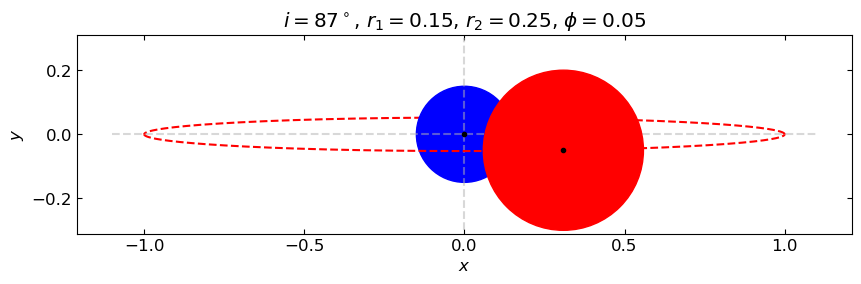

Here the red dashed line shows the path of the centre of star 2 relative to star 1. The black dots mark the centres of the two stars. At the phase shown, which is near the end of an eclipse of star 1, star 2 is moving towards the right and has just started to move away from Earth.

<span style="color:blue">**Ex A.1**</span>
On the plane of the sky, the maximum separation between the centres of the two stars $=1$. Show that the minimum separation is given by the cosine of the orbital inclination $= \cos(i)$.

<span style="color:blue">**Ex A.2**</span>
Show that assumptions (3) and (5) imply that:
$$ \cos(i) \le r_2 - r_1 .$$
Verify that this condition is satisfied by the system shown in the figure above (see plot title for parameters).

<span style="color:blue">**Ex A.3**</span>
Ignoring assumption (3) (total eclipses) for the moment, derive a similar condition on the values of $i$, $r_1$ and $r_2$ that ensures that a binary star eclipses at all.

---

## Contact Phases and Fluxes

Eclipses are defined by a set of distinct "contact phases" where the light curve (flux versus phase) goes through inflections. For a totally eclipsing binary there are four such contacts per eclipse, and two eclipses per orbit as first star 2 occults star 1, and then half a cycle later star 1 transits the face of star 2. The contact phases are illustrated in the figure below, which was created using the same parameters shown in the figure above, but illustrated the appearance on the plane of the sky at each of the special phases:

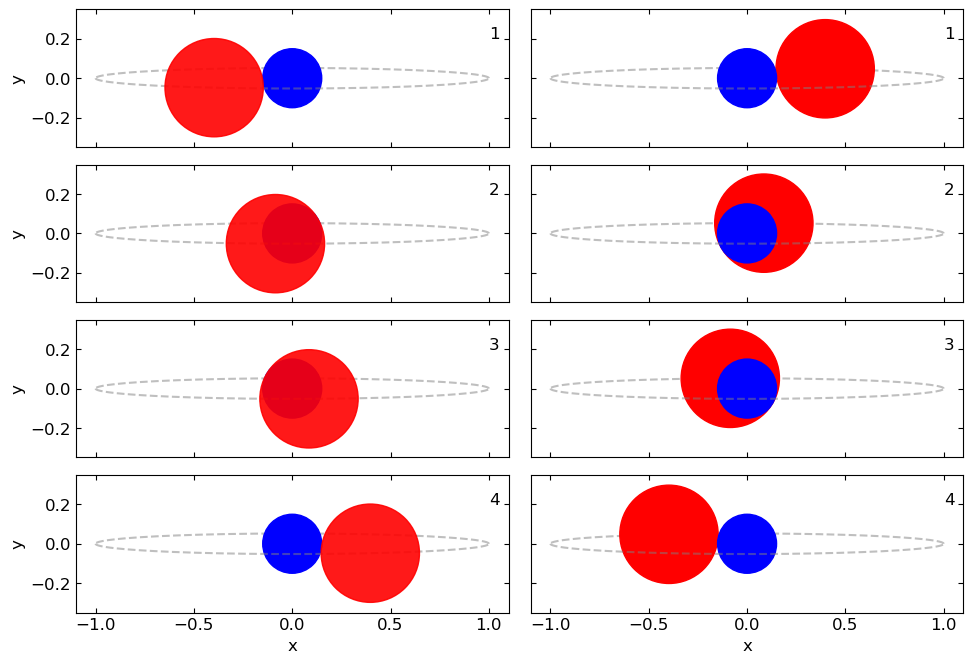

The left-hand panels from top to bottom show the geometry of the stars during the eclipse around phaze zero ($\phi = 0$). The eclipse starts ("first contact") at the top-left when star 2 (closest to Earth) just appears to touch star 1. The flux starts to drop at this point in a smooth manner until "second contact" (next panel down, labelled 2). With star 1 now completely behind star 2 (plotted slightly transparently to show where star 1 is), there is now no change in flux until third contact (panel 3 on the left). This leads to a "flat bottomed" eclipse, the classic hallmark of a totally eclipsing binary. As star 1 emerges from behind star 2, the flux will start to rise until at fourth contact (panel 4 on the left), the eclipse has finished.

The right-hand panels show a very similar sequence of events half a cycle later, but now star 1 transits across star 2. With our assumed constant surface brightness, there is again no change in flux between panels 2 and 3 on the right. (In reality because of limb-darkening this second eclipse would be be somewhat curved around mid-eclipse, helping to distinguish which star is closest to Earth at each eclipse.)

The light curve corresponding to the same binary is shown in the figure below:

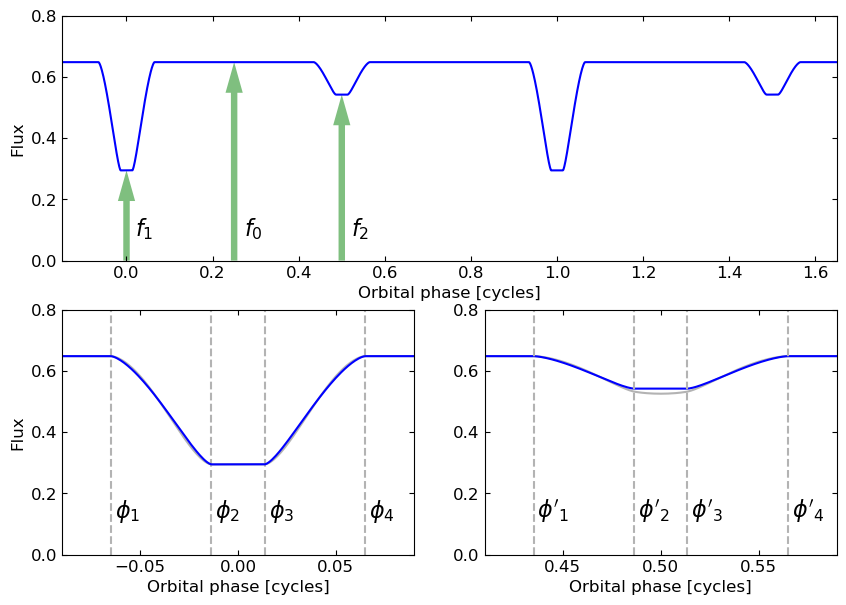

The top panel shows the full light curve of 1.8 orbits covering two pairs of eclipses. It defines three flux levels $f_0$ for the out-of-eclipse level; $f_1$ for the level at mid primary eclipse and $f_2$ for the level at mid secondary eclipse that will be used to deduce stellar radii later. The bottom panels zoom in on the primary and secondary eclipse and show the meaning of the four contact phases in terms of the light curve. Note that the contact phases essentially repeat on the secondary eclipse: each dashed contact phase is 0.5 more than it's undashed version, e.g. $\phi'_1 = \phi_1 + 0.5$, etc. The lower panels also include an additional simulation (plotted in grey) which **does** include limb darkening to illustrate the points about "flat bottomed" total eclipses versus curved transits mentioned above.

---

## <span style="color:blue">Exercises B</span>

The parametric equations of the ellipse traced out by the centre of star 2 in the plots above are
$$
\begin{align}
x & = + \sin(2\pi \phi),\\
y & = - \cos(i) \cos (2\pi \phi),
\end{align}
$$
where $\phi$ is the orbital phase as usual.

<span style="color:blue">**Ex B.1:**</span>
Use these relations along with the above definitions of the contact phases to show that the third and fourth contact phases, $\phi_3$ and $\phi_4$, obey the relations
$$
\begin{align}
\sin^2(i) \sin^2(2\pi\phi_3) + \cos^2(i) &= (r_2-r_1)^2,\\
\sin^2(i) \sin^2(2\pi\phi_4) + \cos^2(i) &= (r_2+r_1)^2.
\end{align}
$$

<span style="color:blue">**Ex B.2:**</span>
Use these relations to calculate $\phi_3$ and $\phi_4$ for the system illustrated in the figures above.

<span style="color:blue">**Ex B.3:**</span>
Given measurements of $\phi_3$ and $\phi_4$ from the light curve of a binary, can the two relations of **Ex B.1** be solved to determine $r_1$ and $r_2$ or not? Explain your answer.

Would measurements of $\phi_1$ and $\phi_2$ provide any additional help?

<span style="color:blue">**Ex B.4:**</span>
The flux out of eclipse $f_0$ is given by
$$ f_0 = \pi r_1^2 s_1 + \pi r_2^2 s_2,$$
where $s_1$ and $s_2$ are the surface brightnesses of each star. Derive similar relations for $f_1$ and $f_2$.

<span style="color:blue">**Ex B.5:**</span>
Show that measurements of $f_0$, $f_1$ and $f_2$ give the ratio of stellar radii as
$$ \frac{r_1}{r_2} = \sqrt{\frac{f_0-f_2}{f_1}}.$$

---

# Python-based exercises

In the final section of the notebook, we try measuring some simulated light curves. The aim of this exercise is to carry out measurements of contact phases and fluxes ($\phi_3$, $\phi_4$, $f_0$, $f_1$, $f_2$) from which values of inclination angle, radii and surface brightnesses will be calculated ($i$, $r_1$, $r_2$, $s_1$, $s_2$).
This shows how one can go from observational data in the form of a light curve to deduce physical parameters of interest.

Go through the code sections step-by-step and in order, and check that each one seems to work by checking for any errors in the dialogues that may appear immediately beneath each section as you run it.

<div class="alert alert-block alert-info">
Some sections should produce interactive plots (ones you can zoom and pan) outside your browser. If you don't see them, they may be hidden underneath
your browser window.
</div>


## Light curve simulation in more detail

The movie above included a computation of a light curve. The next section shows this in more detail to illustrate how the data files to be measured later were created. It does this by calculating and plotting a model light curve, to which artificial "noise" is added. The data generated will be saved to a file called `test_light_curve.txt`.

Feel free to modify the parameters of the code here and re-run it multiple times to get a feel for it, but re-set to the original parameters and re-run the section before proceeding further to make sure of having a valid data file for one of the later section. The plot should allow you to pan and zoom.

<a id="simulation"></a>

In [7]:
# This is the "simulation" cell. It should produce an interactive plot.
#
# A routine called "binary.lcurve" calculates a light curve given a set of
# parameters defining a binary and an array of orbital phases. Artificial
# gaussian noise is added to simulate real data more closely. This section
# runs it and plots the result. Try editing the values to see the effects
# they have. See how the presence of noise makes it harder to judge the 
# eclipse contact points.
#
# Uncomment the next line to see details of the method:
# help(binary.lcurve)

# Make sure movie plot has been closed
plt.close()

# Define the binary star
iangle = 87
r1 = 0.15
r2 = 0.25
s1 = 5.0
s2 = 1.5

# Define an array of phases covering more than one orbit
phases = np.linspace(-0.15, 1.65, 2000)

# Calculate the light curve 
# [lc = total light, lc1 = light from star 1 only, lc2 = light from star 2 only]
lc, lc1, lc2 = binary.lcurve(phases, r1, r2, 0, 0, s1, s2, 200, 200, iangle)

# Create pseudo-random number generator
rng = np.random.default_rng()

# Add a constant amount of noise. In practice the noise level depends
# on target brightness, telescope size and instrument efficiency.
# the parameter signal_to_noise_ratio is the signal-to-noise ratio
# outside eclipse.
signal_to_noise_ratio = 100.0
sigma = lc.max()/signal_to_noise_ratio
data = rng.normal(lc, sigma)

# Plot the data as points with errorbars plus the original model as a line
plt.errorbar(phases, data, sigma, fmt='.g', label='Data', ecolor='0.7', zorder=10)
plt.plot(phases, lc, 'k', label='Model', lw=2, zorder=1)
plt.legend()
plt.xlabel('Orbital phase [cycles]')
plt.ylabel('Flux')
plt.show()

# Save the data in a 3-column format text file
header = f"""
iangle = {iangle}, r1 = {r1}, r2 = {r2}, s1 = {s1}, s2 = {s2}

The three columns are phase, flux, error in flux
"""

np.savetxt(
    'test_light_curve.txt',
    np.column_stack([phases,data,sigma*np.ones_like(phases)]),
    header=header
)

## Measuring contact phases and fluxes

In the next section, the plot will allow you to define contact phases and flux levels. You **must** complete all measurements (5 in all) before running the following section else an error will occur when you try the next section. Prompts for the measurements will appear in your browser below the section. You will only be finished when the plot disappears following the final measurement.

<a id="measurement"></a>

In [8]:
# This is the "measurement" cell. It should produce an interactive plot.
#
# Close previous plot
plt.close()

# Again ensure an interactive plot
%matplotlib auto

# Set dfile to point to the data file just created 
dfile = 'test_light_curve.txt'

# Load the data 
phs, fs, fes = np.loadtxt(dfile, unpack=True)

# Open plot, plot the data, create object to measure data using a cursor,
# show the plot
fig, ax = plt.subplots()
plt.errorbar(phs, fs, fes, fmt='.g')
measure = binary.Measure(ax)
plt.show()


Using matplotlib backend: Qt5Agg


Use the mouse to define contact phases and flux levels.
You may want to pan and zoom the plot to help with your selections.


Left-click to define the horizontal location of the third contact
.... stored third contact phase = 0.015036895442015204

Left-click the location of the fourth contact
.... stored fourth contact phase = 0.06428167813812677

Left-click at the level of the out-of-eclipse flux
.... stored out-of-eclipse flux = 0.6488182683897145

Left-click at the level of the mid-primary-eclipse flux
.... stored mid-primary-eclipse flux = 0.295085133909201

Left-click at the level of the mid-secondary-eclipse flux
.... stored mid-secondary flux = 0.539874408137826


---

# Solving for the binary parameters

Have you finished all measurements? The plot should have disappeared if you have, and the final two lines should be something like:

> Left-click at the level of the mid-secondary-eclipse flux<br> 
  .... stored mid-secondary flux = 0.8637370023671705

albeit with a different value. If all is OK, then you can run the next section which takes those measurements and solves for iangle, r1, r2, s1, s2. Note how five measurements are needed to solve for five unknowns.

<a id="solution"></a>

In [9]:
# This is the "solution" cell. [Produces no plot, just typed output]

if len(measure.results) == 5:
    
    # unpack the results
    phase3, phase4, f0, f1, f2 = measure.results
    
    # print a summary of them
    print('\nSummary of measured contact phases and flux levels:')
    print(f'\nphase3 = {phase3:.6f}, phase4 = {phase4:.6f}, f0 = {f0:.5f}, f1 = {f1:.5f}, f2 = {f2:.5f}')

    # solve for the orbital inclination, radii, and surface brightnesses
    iangle, r1, r2, s1, s2 = binary.solve_binary(phase3, phase4, f0, f1, f2)

    # print the results
    print(f'\nBinary parameters deduced:\n\nData = {dfile}, iangle = {iangle:.4f}, r1 = {r1:.5f}, r2 = {r2:.5f}, s1 = {s1:.4f}, s2 = {s2:.4f}\n')

else:
    # oops, haven't got 5 measurements. Print error message
    print(f'Number of measurements = {len(measure.results)} but five are required to solve for the binary parameters')
    print('You should run the previous code section once more and complete all measurements')


Summary of measured contact phases and flux levels:

phase3 = 0.015037, phase4 = 0.064282, f0 = 0.64882, f1 = 0.29509, f2 = 0.53987

Binary parameters deduced:

Data = test_light_curve.txt, iangle = 88.9742, r1 = 0.14867, r2 = 0.24468, s1 = 5.0943, s2 = 1.5690



---

## Review your results

Look at your results; how well did you manage to recover the original values of iangle, r1, r2, s1 and s2 used to simulate the data in the [simulation](#simulation) cell? If you repeat the measurements starting at the [measurement](#measurement) cell, how self-consistent are you? If you try it a few times over for different levels of noise (i.e. re-generate the data starting at the [simulation](#simulation) cell) for different values of the `signal_to_noise_ratio` parameter, you should get a sense of how noise affects the recovery of the fundamental parameters we are after. Several runs with the same binary parameters would allow you to build up a distribution of final recovered values (iangle, r1, etc) from which you could judge how precisely they are measured. This is the sort of information one needs to be able to work out which telescope to use, or how many nights of observing are required for a given target.

## <span style="color:blue">Exercises C</span>

**<span style="color:blue">Ex. C.1:</span>** Create an inline plot of the simulated data in your notebook of answers. Annotate your plot to indicate your measurements of the contact phases and flux levels. It's up to you how you do this, but your aim should be to convey to whoever looks at the plot that your measurements are about right. 

**<span style="color:blue">Ex. C.2:</span>**
For this final exercise, apply the same pair of steps from the [measurement](#measurement) and [solution](#solution) cells to the ten pre-prepared data files with names `data01.txt`, `data02.txt`, ..., `data10.txt`. i.e. change the file name in the line
```python
dfile = 'test_light_curve.txt'
```
of the [measurement](#measurement) cell from `test_light_curve.txt` to point to each of the downloaded files, one-by-one, carry out the same measurements, solve each set of measurements for the binary parameters, and arrange your results into a table of the following form


| File  | iangle | r1 | r2 | s1 | s2 |
| :- | :-: | :-: | :-: | :-: | :-: |   
| data01.txt | 86.5998 | 0.16050 | 0.26499 | 4.3812 | 1.3327|
| data02.txt | 88.2322 | ... | ... | ... | ... |
| . |
| . |
| . |
| data10.txt | ... | ... | ... | ... | ... |


in your notebook of answers, with one line of numbers for each of the ten files. The binary parameters used to generate the data files have been recorded, so the challenge is to see how close you come to those values!

---

# Going further

This final section involves no more exercises and is just for those who want to take things a bit further. The question we look at here is, can we automate the processes just carried out?

The measurement "by hand" approach used above is tedious and error prone. It does not use all of the information in the light curve and is potentially subject to human biases, particularly in the case of setting contact points in the presence of noise. Can you think of ways to improve on it?

Here is a final bit of code that implements one way; see if you can understand what it does. You will need to look into the code of "binary.py" to do so.

This code takes a while to run (about a minute on my PC), so give it a chance. If it works, you should see the solution stabilise and that the final fit is dramatically better than the initial guess. 

Compare the final values returned against the original input parameters and the determination of them based upon your "by hand" measurements. If you can, take a look at your PC/laptop's CPU usage as it runs: lots of calculations are taking place! You might hear its cooling fan start up. The method used does not rely on assuming constant surface brightness and is generalisable to much more complex models than are used here. But it is not perfect: if you start from a very poor solution, e.g. not eclipsing at all, it might never find a solution. More effort would be needed to guard against such cases, and there are ways to make it operate faster. Still, such data fitting is of very widespread utility in many scientific fields.

You could at this point design a script that repeatedly simulated a binary with a fixed set of parameters but with a diffierent set of random noise added each time, and then run the automatic parameter estimator. If you saved the outputs from such simulations, you would have estimates for how well observations could tie down $i$, $r_1$, $r_2$, $s_1$ and $s_2$. If you have heard of "MCMC" (Markov Chain Monte Carlo), you could also use the function `binary.func` that is used below to apply MCMC to the data to deduce distributions of the model parameters.

That's it. I hope you have gained a little understanding of binary stars, and a little insight into data analysis. 

In [5]:
# This section will generate an interactive plot once the final solution
# has been reached. It will first display 6 lines starting 'Solution ...'
#
# import a useful function from the scientific data
# analysis module scipy
from scipy.optimize import fmin

# Load the test data once again 
dfile = 'data03.txt'
phs, fs, fes = np.loadtxt(dfile, unpack=True)

# Initial guess at iangle, r1, r2, s1, s2
iangle, r1,r2, s1,  s2 = 89, 0.2, 0.3, 4.0, 1.7

# Initial vector
x = [iangle, r1, r2, s1, s2]

# compute initial model
lcinit, lc1, lc2 = binary.lcurve(phs, r1, r2, 0, 0, s1, s2, 200, 200, iangle)

# Print intial values
print(f'Solution  0: i = {iangle:.4f}, r1 = {r1:.5f}, r2 = {r2:.5f}, s1 = {s1:.4f}, s2 = {s2:.4f}')

for n in range(10):
    # Try to automatically refine values
    x = fmin(binary.func, x, (phs,fs,fes), maxiter=200, disp=False)
    iangle, r1, r2, s1, s2 = x
    #print(f'Solution {n+1:2d}: i = {iangle:.4f}, r1 = {r1:.5f}, r2 = {r2:.5f}, s1 = {s1:.4f}, s2 = {s2:.4f}')
    print(f'| {dfile} | {iangle:.4f} | {r1:.5f} | {r2:.5f} | {s1:.4f} | {s2:.4f} |')

# compute final model
lcfin, lc1, lc2 = binary.lcurve(phs, r1, r2, 0, 0, s1, s2, 200, 200, iangle)

# plot initial and final models against the data
plt.close()
plt.errorbar(phs,fs, fes, fmt='.g', ecolor='0.7', label='data')
plt.plot(phs, lcinit, 'r', label='initial model')
plt.plot(phs, lcfin, 'b', label='final model')
plt.legend()
plt.show()


Solution  0: i = 89.0000, r1 = 0.20000, r2 = 0.30000, s1 = 4.0000, s2 = 1.7000
| data03.txt | 72.7806 | 0.05755 | 0.38557 | 7.1243 | 1.2765 |
| data03.txt | 76.0677 | 0.07571 | 0.34946 | 4.1014 | 1.5563 |
| data03.txt | 78.9240 | 0.06903 | 0.31838 | 4.8844 | 1.8774 |
| data03.txt | 79.8522 | 0.06717 | 0.30863 | 5.1418 | 1.9985 |
| data03.txt | 81.5759 | 0.06447 | 0.29356 | 5.5563 | 2.2105 |
| data03.txt | 81.5778 | 0.06456 | 0.29347 | 5.5255 | 2.2127 |
| data03.txt | 81.8229 | 0.06409 | 0.29097 | 5.6080 | 2.2507 |
| data03.txt | 81.8333 | 0.06411 | 0.29096 | 5.6063 | 2.2508 |
| data03.txt | 81.8333 | 0.06411 | 0.29096 | 5.6060 | 2.2509 |
| data03.txt | 81.8334 | 0.06411 | 0.29096 | 5.6060 | 2.2509 |
